# **Raw-SERS-map: Generates raw dataset for SERS map**

## **Code Setup**

In [49]:
# General imports
# -----------------------------

import os
import sys
import random
import numpy as np
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.ticker import FormatStrFormatter
from  matplotlib.ticker import FuncFormatter
import warnings


# Specific imports
# -----------------------------

sys.path.append('./modules/')
import utils_v1 as utils

# preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter



Functions/Classes

In [50]:
# def foo(par):
#     ...

#     return result
# -----------------------------


Running configurations

In [51]:
# matplotlib
%matplotlib inline

# pandas display
pd.options.display.float_format = "{:,.3f}".format

# random number generators
seed = 17

# ignore warnings
warnings.filterwarnings("ignore")

# configure plots
fs_axeslabels = 20
fs_ticklabels = 16
fs_text = 12
fs_legend_title = 20
fs_legend = 16
resol = 300

# substrato-11ago2021
# band = ['1079.03']

# substrato-03set2021
band = ['1079.12']


Input parameters

In [52]:
# param = ['nb_name', 'exp_name', ['list_imgs'], 'path_out']
# nb_name: name of this notebook
# exp_name: name of the experiment
# path_out: path to save the results
# path_in: path of the input

#default
param = ['raw-SERS-wallance-v1',
        'raw', 
        '../data/datasets/substrato-03set2021/',
        '../data/experimental/substrato-03set2021/',
        ]


Show input parameters

In [53]:
nb_name = param[0]
exp_name = param[1]
exp_id = nb_name

if exp_name:
    exp_id += '_' + exp_name

path_out = param[2] + exp_id + '/'
path_in = param[3]

print('nb_name=', nb_name)
print('exp_name=', exp_name)
print('path_out=', path_out)
print('path_in=', path_in)


nb_name= raw-SERS-wallance-v1
exp_name= raw
path_out= ../data/datasets/substrato-03set2021/raw-SERS-wallance-v1_raw/
path_in= ../data/experimental/substrato-03set2021/


Create output folder

In [54]:
# path to save outputs
utils.create_folder(path_out)


## **Generating Raw Dataset**

In [55]:
# parameters
# -----------------------------
pts = 1014   # points in a spectrum
n_spec = 441 # number of spectra in a file.

# get folders for the classes
# -----------------------------
# {class name: label}  {'control': 0, 'antigen': 1, 'blank': 3, 'substrate': 4}

# substrato-11ago2021
# class_dict = {'control': 0, 'antigen': 1, 'blank': 3}

# substrato-03set2021
# class_dict = {'control': 0, 'antigen': 1, 'interfering': 2, 'substrate': 4 }
class_dict = {'control': 0, 'antigen': 1, 'interfering': 2}
# class_dict = {'antigen': 1}

print('classes:')
print(class_dict)
print('\n')

rs_1 = []
rs_2 = []
out_1 = []
out_2 = []

flag_ini = 1
for c in class_dict.items():
    
    path_maps = path_in + c[0] + '/'
    maps = sorted(os.listdir(path_maps), key=str.lower)
   
    for map_i, map_name in enumerate(maps):
        
        # print('class ' + class_name + ', map ' + map_name)

        data = np.loadtxt(path_maps + '/' + map_name, delimiter = "\t")
        
        if not data.shape[0] == n_spec * pts:    
            raise Exception('Error in map ' + map_name + '. Number of spectra (' + str(data.shape[0]) + ') unexpected.')
        
        n_copy = data.shape[0]/pts
        print(c[0], map_name, n_copy)
        
        for copy_i in range(int(n_copy)):

            copy_ini = copy_i*pts
            copy_end = (copy_i+1)*pts
            pos_x = int(data[copy_ini, 0])
            pos_y = int(data[copy_ini, 1])

            # print(class_name, map_name, copy_i, copy_ini, copy_end, pos_x, pos_y)

            if flag_ini:
                    read_prev = data[copy_ini: copy_end, -2]
                    flag_ini = 0
            else:
                if not np.array_equal(data[copy_ini: copy_end, -2], read_prev):
                    raise Exception('Error in class ' + c[0] + ', map ' + map_name + ', copy ' + str(copy_i) + '. Raman Shift axis is different.')
                else:
                    read_prev = data[copy_ini: copy_end, -2]


            # rs_1.append(data[copy_ini: copy_end, -2])
            # rs_2.append([pos_x, pos_y, copy_i, int(map_i), int(c[1])])

            # print('copy: ' + str(copy_i), end='\r')

            out_1.append(data[copy_ini: copy_end, -1])
            out_2.append([pos_x, pos_y, copy_i, int(map_i), int(c[1])])

df_out_1 = pd.DataFrame(data=out_1, columns=data[copy_ini: copy_end, -2])
df_out_2 = pd.DataFrame(data=out_2, columns=['x', 'y', 'copy', 'map', 'class'])

df_out = pd.concat([df_out_1, df_out_2], axis=1)
df_out = df_out.sort_values(by=['class', 'map', 'copy'], ignore_index=True)
df_out.to_csv(path_out + exp_id + '.csv', index=False)
df_out



classes:
{'antigen': 1}


antigen antigeno1.txt 441.0
antigen antigeno10.txt 441.0
antigen antigeno11.txt 441.0
antigen antigeno12.txt 441.0
antigen antigeno13.txt 441.0
antigen antigeno14.txt 441.0
antigen antigeno15.txt 441.0
antigen antigeno16.txt 441.0
antigen antigeno2.txt 441.0
antigen antigeno3.txt 441.0
antigen antigeno4.txt 441.0
antigen antigeno5.txt 441.0
antigen antigeno6.txt 441.0
antigen antigeno7.txt 441.0
antigen antigeno8.txt 441.0
antigen antigeno9.txt 441.0


,1611.19,1610.19,1609.18,1608.18,1607.17,1606.17,1605.16,1604.16,1603.15,1602.14,...,476.105,474.84,473.574,472.308,471.042,x,y,copy,map,class
0,"1,971.640","2,113.540","2,145.430","2,147.460","2,134.560","2,268.410","2,310.190","2,478.760","2,607.480","2,793.300",...,855.849,879.351,883.085,853.242,892.524,-10,-10,0,0,1
1,"2,061.260","2,096.110","2,093.170","2,199.710","2,214.170","2,273.380","2,404.690","2,446.440","2,649.730","2,818.150",...,873.638,865.518,875.183,872.993,904.372,-10,-9,1,0,1
2,"2,043.830","2,036.360","2,080.720","2,149.950","2,176.850","2,328.100","2,327.600","2,516.050","2,649.730","2,778.390",...,828.177,887.255,902.841,872.993,849.083,-10,-8,2,0,1
3,"2,001.510","2,041.340","2,068.280","2,102.670","2,216.650","2,233.590","2,322.630","2,545.880","2,595.050","2,828.090",...,855.849,859.590,867.281,916.445,922.143,-10,-7,3,0,1
4,"2,031.380","2,098.600","2,120.550","2,192.250","2,236.560","2,365.410","2,302.730","2,458.870","2,652.220","2,808.210",...,897.356,907.016,918.646,928.295,876.727,-10,-6,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,"1,919.360","1,981.600","2,020.990","1,980.740","2,132.070","2,183.840","2,131.150","2,322.130","2,401.170","2,654.130",...,804.458,754.858,756.648,736.711,752.327,10,6,436,15,1
7052,"1,904.420","2,038.850","2,003.570","2,065.340","2,149.480","2,198.760","2,223.160","2,324.610","2,440.940","2,661.590",...,774.810,776.595,748.746,762.387,758.251,10,7,437,15,1
7053,"1,961.680","1,986.570","1,998.590","2,035.480","2,089.770","2,201.250","2,307.710","2,297.260","2,527.940","2,659.100",...,739.232,756.834,762.575,792.014,754.301,10,8,438,15,1
7054,"2,001.510","2,036.360","2,053.350","2,020.550","2,201.730","2,181.350","2,205.750","2,394.230","2,440.940","2,698.860",...,806.435,752.882,770.477,766.337,776.022,10,9,439,15,1


Verify dataset generated

In [56]:
print(df_out.groupby(['class', 'map'])['map'].count())

diff = 0.0
n_spec = len(out_1)

for i in range(n_spec):

    spec_exp = np.array(out_1[i])
    spec_raw = df_out.iloc[i, :-5].values

    diff += np.sum(spec_exp-spec_raw)

print('\n')
print('n specs = ', n_spec)
print('difference = ', diff)


class  map
1      0      441
       1      441
       2      441
       3      441
       4      441
       5      441
       6      441
       7      441
       8      441
       9      441
       10     441
       11     441
       12     441
       13     441
       14     441
       15     441
Name: map, dtype: int64


n specs =  7056
difference =  0.0


Plot a spectrum

In [57]:
path_in = path_out + exp_id + '.csv'
df_out = pd.read_csv(path_in)
df_out

,1611.19,1610.19,1609.18,1608.18,1607.17,1606.17,1605.16,1604.16,1603.15,1602.14,...,476.105,474.84,473.574,472.308,471.042,x,y,copy,map,class
0,"1,971.640","2,113.540","2,145.430","2,147.460","2,134.560","2,268.410","2,310.190","2,478.760","2,607.480","2,793.300",...,855.849,879.351,883.085,853.242,892.524,-10,-10,0,0,1
1,"2,061.260","2,096.110","2,093.170","2,199.710","2,214.170","2,273.380","2,404.690","2,446.440","2,649.730","2,818.150",...,873.638,865.518,875.183,872.993,904.372,-10,-9,1,0,1
2,"2,043.830","2,036.360","2,080.720","2,149.950","2,176.850","2,328.100","2,327.600","2,516.050","2,649.730","2,778.390",...,828.177,887.255,902.841,872.993,849.083,-10,-8,2,0,1
3,"2,001.510","2,041.340","2,068.280","2,102.670","2,216.650","2,233.590","2,322.630","2,545.880","2,595.050","2,828.090",...,855.849,859.590,867.281,916.445,922.143,-10,-7,3,0,1
4,"2,031.380","2,098.600","2,120.550","2,192.250","2,236.560","2,365.410","2,302.730","2,458.870","2,652.220","2,808.210",...,897.356,907.016,918.646,928.295,876.727,-10,-6,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7051,"1,919.360","1,981.600","2,020.990","1,980.740","2,132.070","2,183.840","2,131.150","2,322.130","2,401.170","2,654.130",...,804.458,754.858,756.648,736.711,752.327,10,6,436,15,1
7052,"1,904.420","2,038.850","2,003.570","2,065.340","2,149.480","2,198.760","2,223.160","2,324.610","2,440.940","2,661.590",...,774.810,776.595,748.746,762.387,758.251,10,7,437,15,1
7053,"1,961.680","1,986.570","1,998.590","2,035.480","2,089.770","2,201.250","2,307.710","2,297.260","2,527.940","2,659.100",...,739.232,756.834,762.575,792.014,754.301,10,8,438,15,1
7054,"2,001.510","2,036.360","2,053.350","2,020.550","2,201.730","2,181.350","2,205.750","2,394.230","2,440.940","2,698.860",...,806.435,752.882,770.477,766.337,776.022,10,9,439,15,1


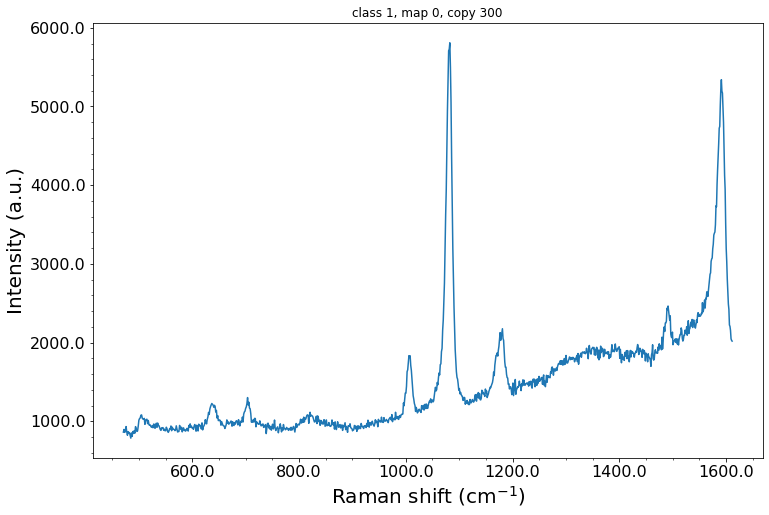

In [58]:
class_i = 1
map_i = 0
copy_i = 300

row_i = df_out.loc[df_out['class'] == class_i].loc[df_out['map'] == map_i].loc[df_out['copy'] == copy_i].index.values[0]
# print(row_i)

y = df_out.iloc[row_i, :-5].values
x = df_out.columns[:-5].values.astype(float)

fig, axes = plt.subplots(1, 1, figsize=(12, 8))
axes.plot(x,y)
title = 'class ' + str(class_i) + ', map ' + str(map_i) + ', copy ' + str(copy_i)
axes.set_title(title)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('Raman shift (cm$^{-1}$)', fontsize=fs_axeslabels)
axes.set_ylabel('Intensity (a.u.)', fontsize=fs_axeslabels)
# axes.xaxis.set_major_formatter(FormatStrFormatter('%d'))
axes.minorticks_on()



# plt.plot(x,y)
# plt.title(title)
# plt.xlabel('Raman shift (cm-1)')
# plt.ylabel('Intensity (a.u.)')
# plt.xlim(400, 1700)
# plt.minorticks_on()
# # plt.legend()
plt.show()



Plot a map

(21, 21)


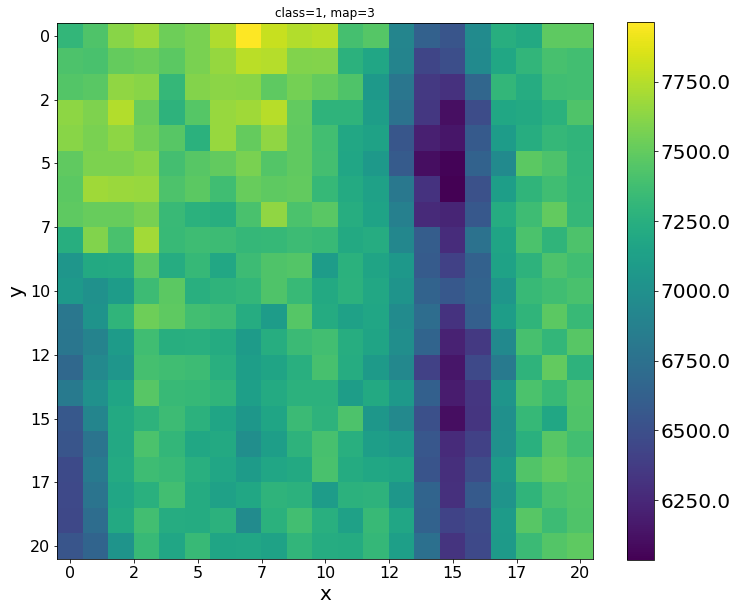

In [59]:
# parameters
# -----------------------------
dim = 21 # number of pixels per row/column
class_i = 1
map_i = 3

# -----------------------------

# pixels = sum of intensities of each spectrum
# df_mi = df_out.loc[df_out['class'] == class_i].loc[df_out['map'] == map_i].iloc[:, :-5]
# mi = np.sum(df_mi.values, axis=1)   # row-wise sum

# pixels = intensities of each spectrum at NB -> '592.726563'
df_mi = df_out.loc[df_out['class'] == class_i].loc[df_out['map'] == map_i].loc[:, band]
mi = df_mi.values

mi = np.reshape(mi, (dim, dim))
print(mi.shape)

# plot SERS map
fig, axes = plt.subplots(1, 1, figsize=(12, 12))
im = axes.imshow(mi)
axes.set_title('class=' + str(class_i) + ', map=' + str(map_i))
cb = plt.colorbar(im, shrink=0.825, ax=axes)
axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
axes.set_xlabel('x', fontsize=fs_axeslabels)
axes.set_ylabel('y', fontsize=fs_axeslabels)
axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
cb.ax.set_yticklabels(cb.ax.get_yticks(), fontsize=fs_axeslabels)
plt.show()


Plot all instances (by class)

1 0
(21, 21)


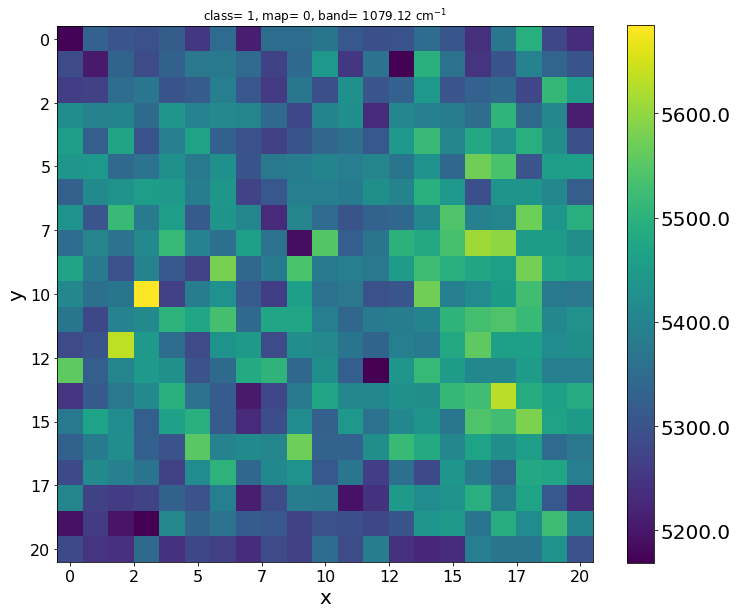

1 1
(21, 21)


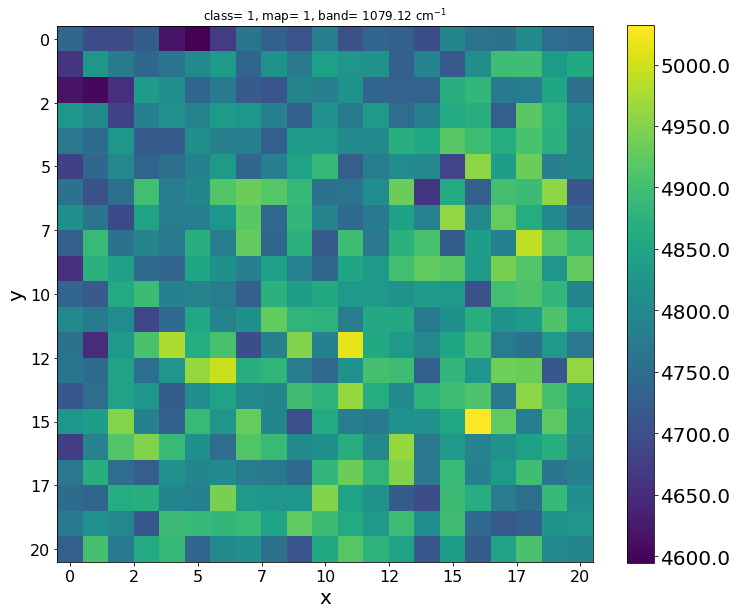

1 2
(21, 21)


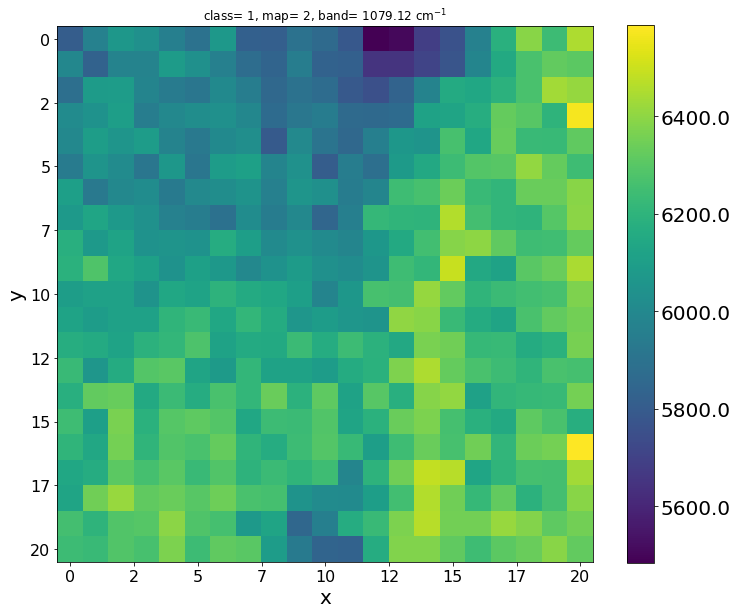

1 3
(21, 21)


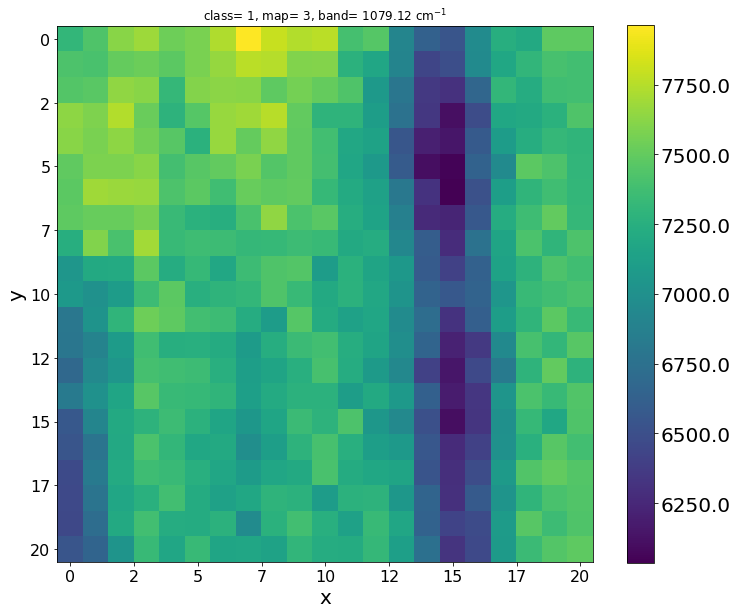

1 4
(21, 21)


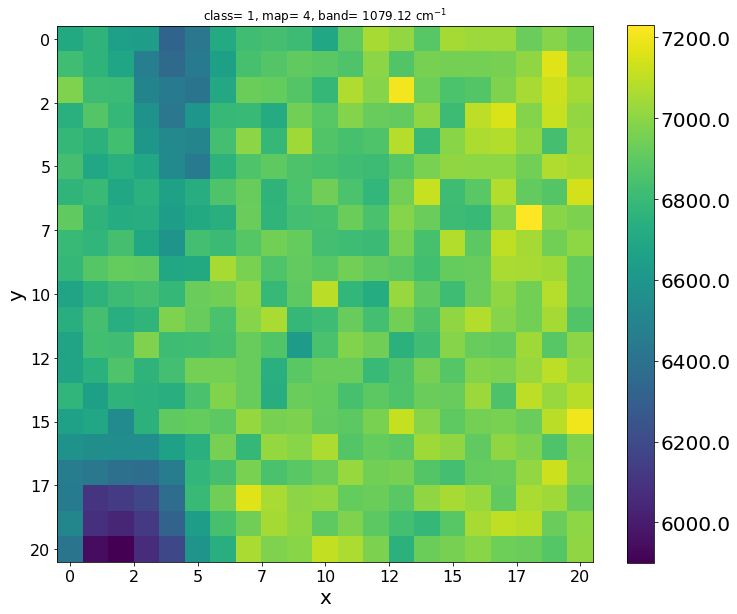

1 5
(21, 21)


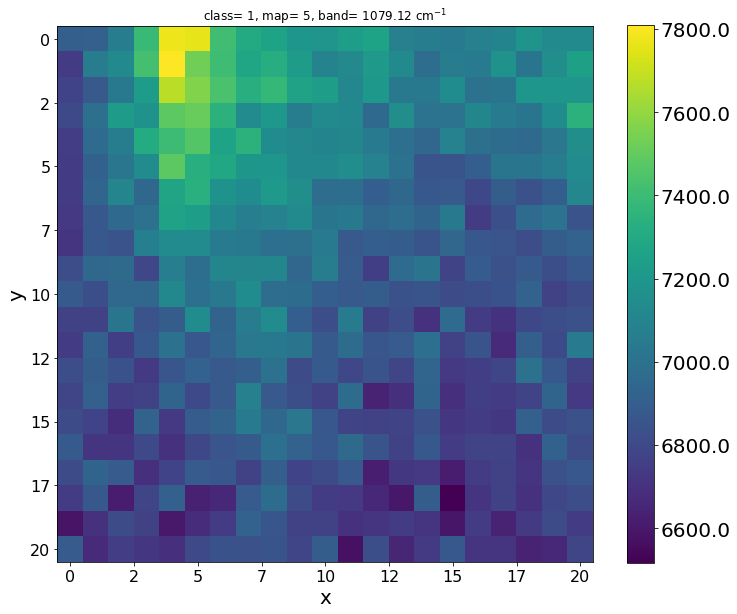

1 6
(21, 21)


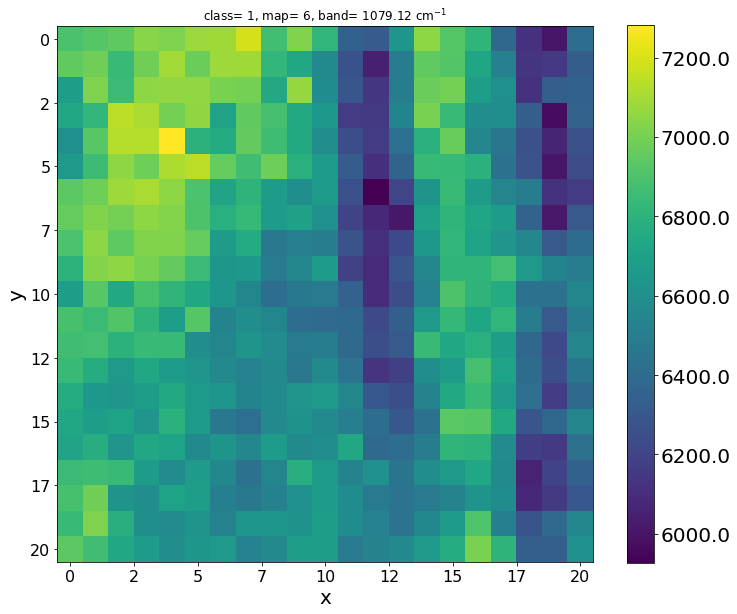

1 7
(21, 21)


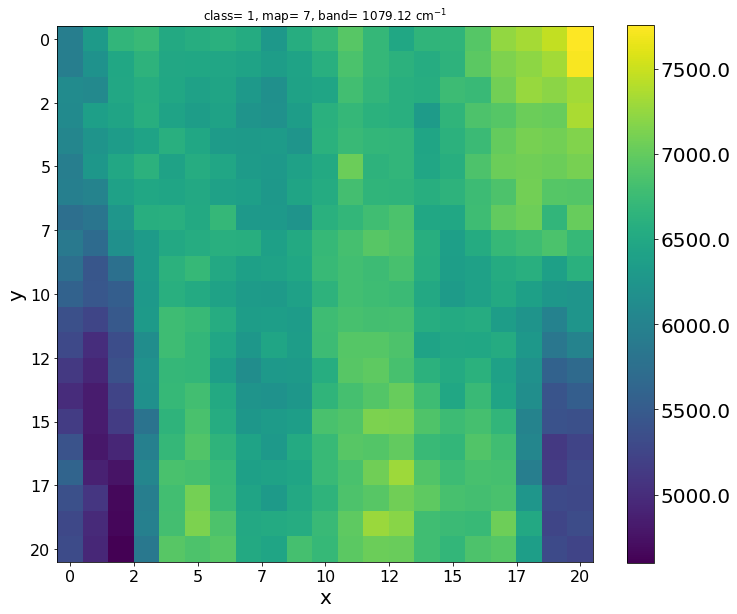

1 8
(21, 21)


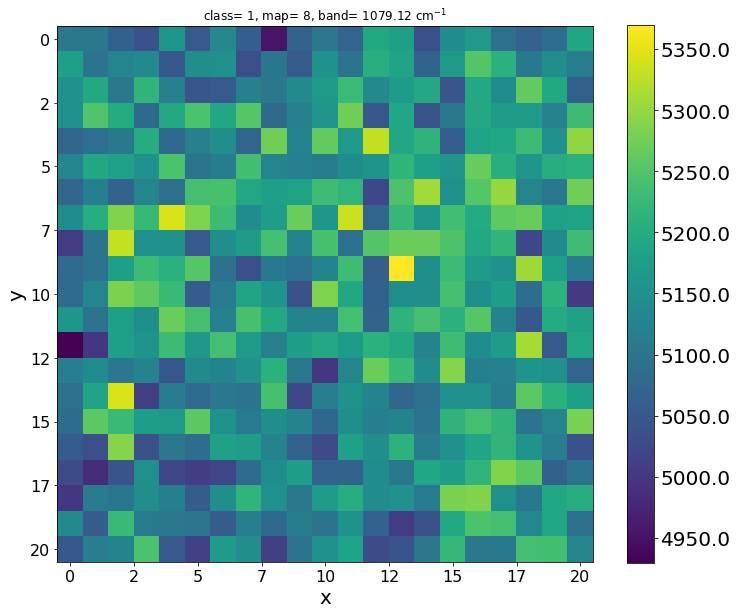

1 9
(21, 21)


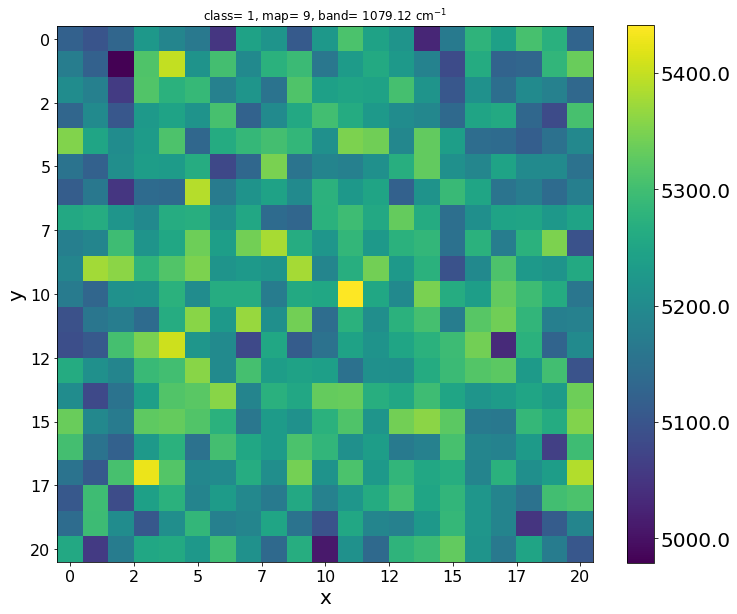

1 10
(21, 21)


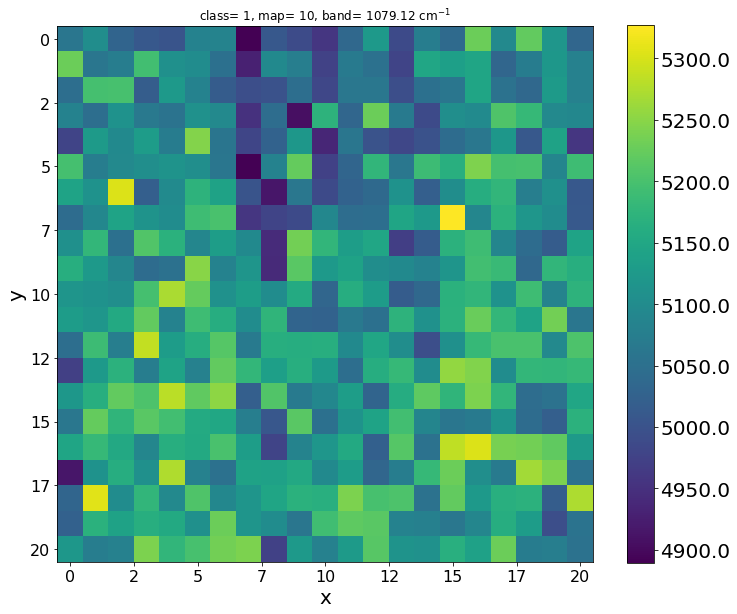

1 11
(21, 21)


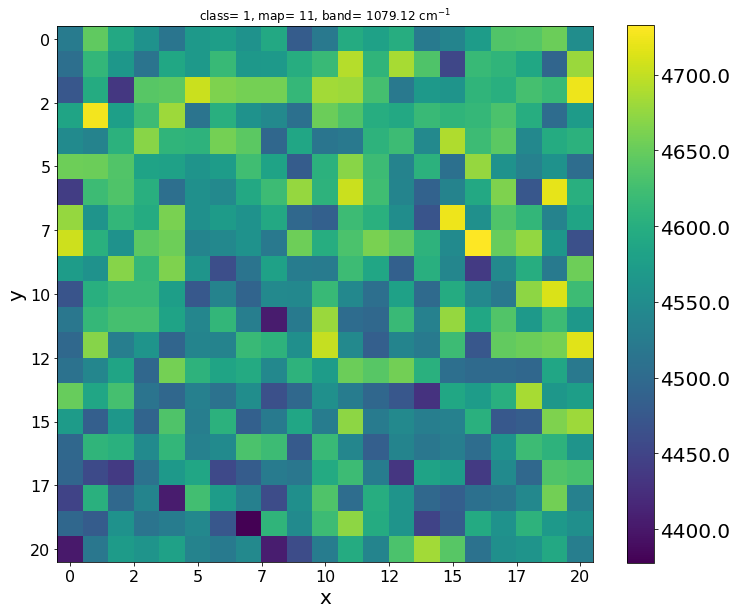

1 12
(21, 21)


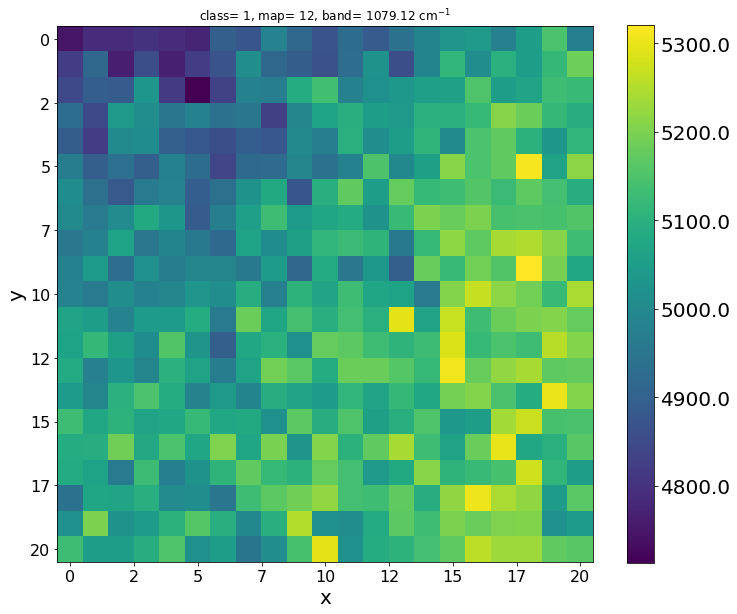

1 13
(21, 21)


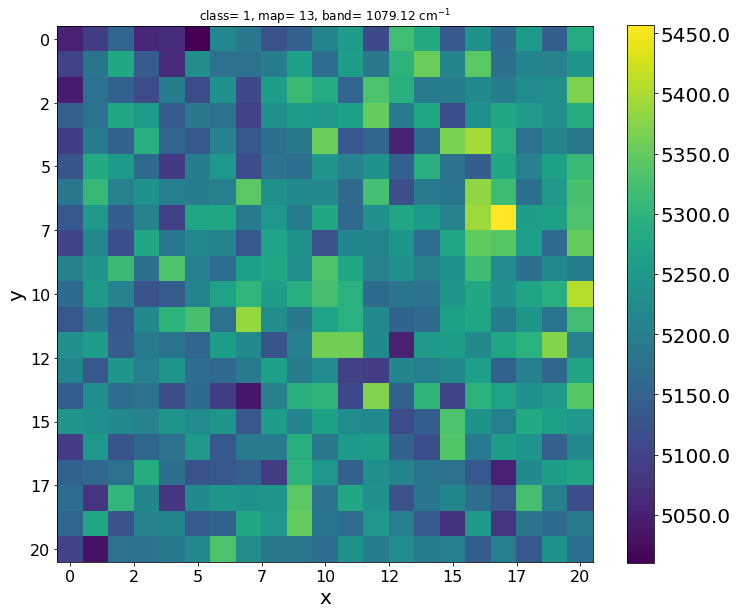

1 14
(21, 21)


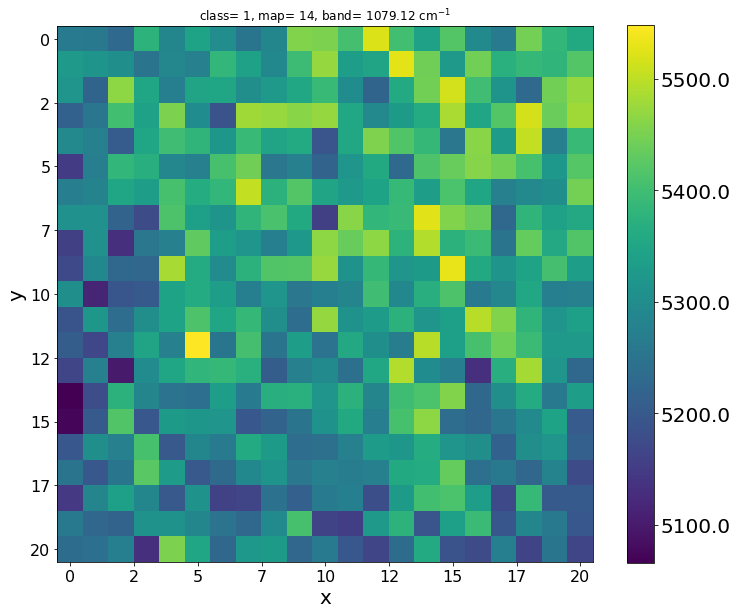

1 15
(21, 21)


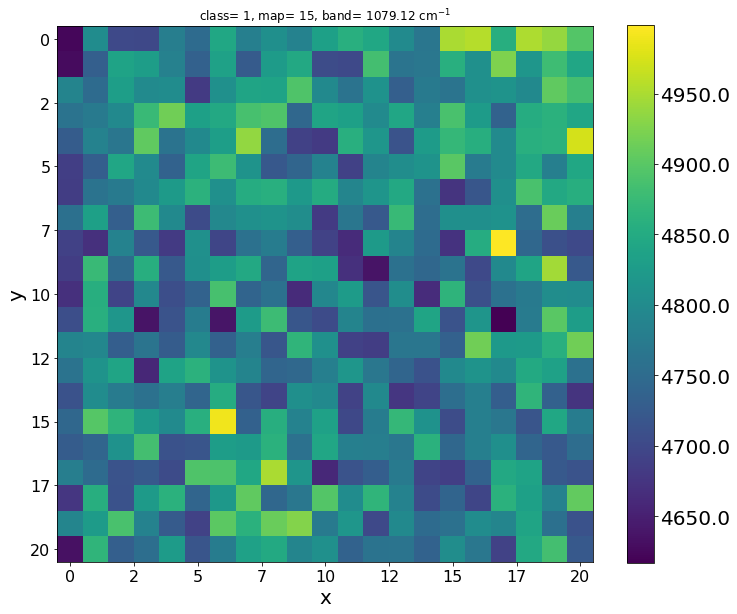

In [60]:
# parameters

# -----------------------------


maps = df_out.groupby(['class', 'map'])

for (class_i, map_i) in maps.indices:

    print(class_i, map_i)

    mi = np.zeros(dim*dim)
    df_mi = df_out.loc[df_out['class'] == class_i].loc[df_out['map'] == map_i].loc[:, band]
    mi = df_mi.values
    
    # norm_1 = np.sum(df_mi.values, axis=1)   # row-wise sum
    # for i in range(len(df_mi)):
    #     mi[i] = df_mi.iloc[i, :-5].div(norm_1[i]).values[142].sum() # '592.726563' = index 142

    mi = np.reshape(mi, (dim, dim))
    print(mi.shape)

    # plot SERS map
    fig, axes = plt.subplots(1, 1, figsize=(12, 12))
    im = axes.imshow(mi)
    axes.set_title('class= ' + str(class_i) + ', map= ' + str(map_i) + ', band= ' + str(band[0]) + ' cm$^{-1}$')
    cb = plt.colorbar(im, shrink=0.825, ax=axes)
    axes.set_xticklabels(axes.get_xticks(), size = fs_ticklabels)
    axes.set_yticklabels(axes.get_yticks(), size = fs_ticklabels)
    axes.set_xlabel('x', fontsize=fs_axeslabels)
    axes.set_ylabel('y', fontsize=fs_axeslabels)
    axes.xaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    axes.yaxis.set_major_formatter(FuncFormatter(lambda x, _: int(x)))
    cb.ax.set_yticklabels(cb.ax.get_yticks(), fontsize=fs_axeslabels)
    plt.show()

    
    # plt.figure(figsize=(10, 6))

    # fig = plt.imshow(mi)
    # plt.title('class=' + str(class_i) + ', map=' + str(map_i))
    # plt.colorbar(fig)
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.show()

    del df_mi, mi 



## **End Code**